# Imports

In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


import warnings

warnings.filterwarnings('ignore')

## Load Data

In [4]:
path = '/home/edilson07/projects/hackday_6/datasets/'

df_raw = pd.read_json(path + 'train.json', orient='split')

## Criar numero de caracteristicas

In [5]:
df_raw['product_details_count'] = df_raw['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

## Transformar detalhes dos produtos em colunas

In [6]:
df_raw['product_details'] = df_raw['product_details'].apply(lambda x: ast.literal_eval(x))

In [7]:
df_raw.head(1)

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,product_details,seller,sub_category,fabrication_time,title,actual_price,product_details_count
0,53df9662-e500-569c-946e-0c8d215a72cd,3.2,26,East I,Clothing and Accessories,2021-02-10 21:17:28,Navy Blue Printed Boxers Has An Inner Elasti...,['https://rukminim1.flixcart.com/image/128/128...,False,8,BXRFTZF7JGX75DAW,"[{'Color': 'Dark Blue'}, {'Fabric': 'Pure Cott...",ZIYAA,Innerwear and Swimwear,653,Printed Men Boxer (Pack of 1),849.0,6


In [8]:
all_keys = set()
for data in df_raw['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    df_raw[key] = df_raw['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
df_raw.drop('product_details', axis=1, inplace=True)

In [9]:
df_raw.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)

# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
df_raw['Pack Of'].fillna(df_raw['Pack Of 2'], inplace=True)

df_raw.drop('Pack Of 2', axis=1, inplace=True)

In [10]:
df_raw.head()

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,seller,sub_category,fabrication_time,title,actual_price,product_details_count,,Upper Pattern,Lining,Country of Origin,Height,Clasp Material,Length,Inside Leg in inch,Package contains,Generic Name,Size,Style Code,Pattern,Rise,Sole Material,Other Details,International Warranty,Neck Type,Hip in inch,Number of Contents in Sales Package,Sleeve in inch,Model Name,Warranty Service Type,Design,Brand,Foot Coverage,Hem,Dupatta Length,Length in inch,Heel Pattern,Outer Material,Domestic Warranty,Clasp Type,Bottom Type,Maximum Age,Season,Shade,Thigh in inch,Reversible,Placket,Warranty Summary,Inseam Length,Leather Type,Sleeve Type,Other Dimensions,Shoe Length,Model Details,Other Features,Color,Model Number,Top Closure,Weight,Animal Source,Belt Loops,Shoulder in inch,Care instructions,Pockets,Inner Material,Fabric care,Collar,Top Length,Neck,Covered in Warranty,Weave type,Fly,Pleats,Brand Color,Sleeve,Pleated,,Width,Bottom Length,Stitching Type,Fabric Care,Ideal For,Weave Type,Material,Strap Material,Rise in inch,Top Type,Lining Material,Tip Shape,Care Instructions,Pocket Type,Knit Type,Faded,Fabric,Style,Occasion,Distressed,Bottom Fabric,Technology Used,Minimum Age,Fabric Details,Coat Type,Vents,Suitable For,Stretchable,Cuff,Hooded,Waistband,Region,Closure,Top Fabric,Thumb Hole,Waist in inch,Sales Package,Character,Type,Not Covered in Warranty,Fit,Secondary Color,Pack Of,School Shoe,Bust in inch,Length Type,Width in inch,Width at Base,Alteration Required,Series,Tanning Process,Fastener,Brand Fit,Type for Flats
0,53df9662-e500-569c-946e-0c8d215a72cd,3.2,26,East I,Clothing and Accessories,2021-02-10 21:17:28,Navy Blue Printed Boxers Has An Inner Elasti...,['https://rukminim1.flixcart.com/image/128/128...,False,8,BXRFTZF7JGX75DAW,ZIYAA,Innerwear and Swimwear,653,Printed Men Boxer (Pack of 1),849.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EIBXCO053,Printed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dark Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pure Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 boxer,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d0142842-84f7-537d-a06f-d85b76488a5f,4.0,33,dream o,Clothing and Accessories,2021-02-11 01:02:46,smiley printed tshirt on round neck cotton tshirt,['https://rukminim1.flixcart.com/image/128/128...,False,12,TSHFWQM96UHR6A4Q,Dream Onn Creations,Topwear,668,Printed Men Round Neck Orange T-Shirt,699.0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,orange,Printed,NaN,NaN,NaN,NaN,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Narrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE,Short Sleeve,NaN,NaN,NaN,NaN,NaN,Do not Iron on print/embroidery/embellishment,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cotton Blend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Wear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pack of 1,NaN,Round Neck,NaN,Regular,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79c8f0d7-30b1-5dd4-9f2f-2fe97782b027,3.9,32,Free Authori,Clothing and Accessories,2021-02-11 00:43:37,Free Authority Presents this Crew Neck Yellow ...,['https://rukminim1.flixcart.com/image/128/128...,False,11,SWSFWCXH2WF6ZYRB,BioworldMerchandising,Winter Wear,53,Full Sleeve Graphic Print Men Sweatshirt,1499.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STY-20-21-001595,Graphic Print,NaN,NaN,Star Wars printed Yellow Sweatshirt for Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crew Neck,Na

In [11]:
df_raw.isna().sum()

_id                                        0
average_rating                             0
number_of_reviews                          0
brand                                      0
category                                   0
crawled_at                                 0
description                                0
images                                     0
out_of_stock                               0
avg_delivery_time_days                     0
pid                                        0
seller                                     0
sub_category                               0
fabrication_time                           0
title                                      0
actual_price                            3496
product_details_count                      0
                                       23073
Upper Pattern                          23247
Lining                                 23268
Country of Origin                      13783
Height                                 23306
Clasp Mate

## Escolher as colunas com menos NaN

In [12]:
details_to_maintain = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       'actual_price',
                       "Fabric",
                        "Fabric Care",
                        "Hooded",
                        "Pockets",
                        "Pack Of",
                        "Secondary Color",
                        "Style Code",
                        "Ideal For",
                        "Reversible",
                        "Neck",
                        "Generic Name",
                        "Brand Fit",
                        "Pattern",
                        "Sleeve",
                        "Country of Origin",
                        "Size",
                        "Fit",
                        "Number of Contents in Sales Package",
                        "Suitable For",
                        "Occasion",
                        "Color",
                        "Neck Type"]

df_raw = df_raw[details_to_maintain]

# Data Description

In [13]:
df1 = df_raw.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23309 entries, 0 to 23308
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   _id                                  23309 non-null  object        
 1   average_rating                       23309 non-null  float64       
 2   number_of_reviews                    23309 non-null  int64         
 3   brand                                23309 non-null  object        
 4   category                             23309 non-null  object        
 5   crawled_at                           23309 non-null  datetime64[ns]
 6   description                          23309 non-null  object        
 7   images                               23309 non-null  object        
 8   out_of_stock                         23309 non-null  bool          
 9   avg_delivery_time_days               23309 non-null  int64         
 10  pid            

In [15]:
df1.describe()

,average_rating,number_of_reviews,crawled_at,avg_delivery_time_days,fabrication_time,actual_price
count,23309.000000,23309.000000,23309,23309.000000,23309.000000,19813.000000
mean,3.367322,27.767386,2021-02-10 22:55:49.561242624,9.933502,366.663563,1480.980568
min,0.000000,0.000000,2021-02-10 20:11:51,3.000000,1.000000,150.000000
25%,3.100000,26.000000,2021-02-10 21:30:50,7.000000,184.000000,895.000000
50%,3.700000,31.000000,2021-02-10 23:01:37,10.000000,369.000000,1256.000000
75%,4.100000,34.000000,2021-02-11 00:17:54,13.000000,550.000000,1799.000000
max,5.000000,41.000000,2021-02-11 01:31:55,19.000000,729.000000,12999.000000
std,1.157570,9.555809,NaN,3.568971,210.255811,967.824650


## Criar colunas Numero de Imagens

In [16]:
df1['images'] = df1['images'].apply(lambda x: ast.literal_eval(x))

In [17]:
df1['number_images'] = df1['images'].apply(lambda x: len(x))

In [18]:
##Coluna Fabric
#df1['has_cotton']    = df1['Fabric'].str.contains('cott', case=False, na=False)
#df1['has_polyester'] = df1['Fabric'].str.contains('poly', case=False, na=False)
#df1['has_lycra']     = df1['Fabric'].str.contains('lycr', case=False, na=False)
#
##Coluna Brand Fit
#df1['is_regular'] = df1['Brand Fit'].str.contains('reg', case=False, na=False)
#df1['is_slim']    = df1['Brand Fit'].str.contains('slim', case=False, na=False)
#df1['is_fit']     = df1['Brand Fit'].str.contains('fit', case=False, na=False)

## Dropar colunas complicadas/descessarias

In [19]:
cols_drop = ['crawled_at','description','title','images']

In [20]:
df1 = df1.drop(cols_drop, axis=1)

In [21]:
df1 = df1.dropna(subset='actual_price')

In [22]:
df1 = df1.fillna(0)

In [23]:
df1.isna().sum()

_id                                    0
average_rating                         0
number_of_reviews                      0
brand                                  0
category                               0
out_of_stock                           0
avg_delivery_time_days                 0
pid                                    0
seller                                 0
sub_category                           0
fabrication_time                       0
actual_price                           0
Fabric                                 0
Fabric Care                            0
Hooded                                 0
Pockets                                0
Pack Of                                0
Secondary Color                        0
Style Code                             0
Ideal For                              0
Reversible                             0
Neck                                   0
Generic Name                           0
Brand Fit                              0
Pattern         

## Encoders

In [24]:
df1.nunique()

_id                                    19813
average_rating                            38
number_of_reviews                         32
brand                                    301
category                                   3
out_of_stock                               2
avg_delivery_time_days                    17
pid                                    18718
seller                                   460
sub_category                              23
fabrication_time                         729
actual_price                             636
Fabric                                   198
Fabric Care                              422
Hooded                                     3
Pockets                                   98
Pack Of                                   14
Secondary Color                           51
Style Code                             15745
Ideal For                                  6
Reversible                                 3
Neck                                      26
Generic Na

In [25]:
df1.columns

Index(['_id', 'average_rating', 'number_of_reviews', 'brand', 'category',
       'out_of_stock', 'avg_delivery_time_days', 'pid', 'seller',
       'sub_category', 'fabrication_time', 'actual_price', 'Fabric',
       'Fabric Care', 'Hooded', 'Pockets', 'Pack Of', 'Secondary Color',
       'Style Code', 'Ideal For', 'Reversible', 'Neck', 'Generic Name',
       'Brand Fit', 'Pattern', 'Sleeve', 'Country of Origin', 'Size', 'Fit',
       'Number of Contents in Sales Package', 'Suitable For', 'Occasion',
       'Color', 'Neck Type', 'number_images'],
      dtype='object')

In [26]:
df1.dtypes

_id                                     object
average_rating                         float64
number_of_reviews                        int64
brand                                   object
category                                object
out_of_stock                              bool
avg_delivery_time_days                   int64
pid                                     object
seller                                  object
sub_category                            object
fabrication_time                         int64
actual_price                           float64
Fabric                                  object
Fabric Care                             object
Hooded                                  object
Pockets                                 object
Pack Of                                 object
Secondary Color                         object
Style Code                              object
Ideal For                               object
Reversible                              object
Neck         

In [27]:
#ONE HOT ENCODER
onehot = ['category','out_of_stock']
df1 = pd.get_dummies(df1, columns=onehot)

In [28]:


#TARGET ENCODER
te_cols = ['_id', 'brand','seller','sub_category',"Fabric",
    "Fabric Care",
    "Hooded",
    "Pockets",
    "Pack Of",
    "Secondary Color",
    "Style Code",
    "Ideal For",
    "Reversible",
    "Neck",
    "Generic Name",
    "Brand Fit",
    "Pattern",
    "Sleeve",
    "Country of Origin",
    "Size",
    "Fit",
    "Number of Contents in Sales Package",
    "Suitable For",
    "Occasion",
    "Color",
    "Neck Type"]


df1[te_cols] = df1[te_cols].astype(str)

te = TargetEncoder(target_type='continuous')
df1[te_cols] = te.fit_transform(df1[te_cols], df1['actual_price'])



## Dropar ID E variável resposta

In [29]:
X = df1.drop(['pid','actual_price'], axis=1).copy()
y = df1['actual_price'].copy()

In [30]:
X

,_id,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
0,1477.068076,3.2,26,1070.661991,8,1070.661991,860.607346,653,1365.158522,1301.158677,1404.898081,1437.452829,1427.360857,1465.272379,1477.068076,1633.730446,1319.099656,1419.526491,1578.284419,1565.988769,1280.287690,1492.570668,1577.761776,1710.048096,1618.903124,1495.138929,1319.706181,1422.676163,1964.218929,1709.916800,5,False,True,False,True,False
1,1477.068076,4.0,33,699.642799,12,694.251813,1300.443844,668,1491.367634,1094.540612,1404.898081,1437.452829,1427.360857,1465.272379,1477.068076,1380.300842,1622.699299,1419.526491,1578.284419,1565.988769,1280.287690,1256.874718,1577.761776,1221.314534,1299.979739,1495.138929,1548.996597,1422.676163,1190.146180,1133.056544,2,False,True,False,True,False
2,1477.709987,3.9,32,1119.407909,11,1093.948885,2513.589498,53,1207.306608,1821.084506,2337.428727,1435.364708,1470.328748,1466.100324,1477.709987,1633.034577,1617.460353,2071.095467,1570.927882,1572.118674,1289.484690,1974.737194,1570.011431,1715.932519,1627.274361,1493.210972,1545.424167,1919.203499,2092.380713,1715.571543,5,False,True,False,True,False
3,1485.216593,3.8,31,1055.082784,11,1055.719258,1296.455101,510,1508.623692,1578.068121,1406.491301,1440.091796,1623.138433,1474.204383,1485.216593,1390.301382,1629.164070,1423.393259,1585.451519,1233.574462,1639.923178,1264.091740,1583.568615,1204.568593,1304.368629,1503.657968,1556.745948,1428.116372,1186.771591,1332.490755,5,False,True,False,True,False
4,1477.068076,2.4,20,834.305892,5,667.482188,1300.443844,496,1491.367634,1214.644396,1404.898081,1437.452829,1427.360857,1465.272379,1477.068076,1380.300842,1319.099656,1419.526491,1043.400543,1565.988769,1280.287690,1256.874718,1313.155143,1151.883825,1299.979739,1495.138929,1548.996597,1422.676163,1190.146180,1133.056544,5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,1485.638170,2.5,21,1281.406056,5,1268.040041,1302.157853,552,1495.633919,1582.510575,1408.865532,1442.766646,1440.552817,1472.356476,1485.638170,1398.973133,1633.495402,1425.954241,1045.258638,1576.006731,1638.106107,1983.977674,1328.418839,1218.477710,1408.027838,1502.573631,1560.123564,1432.087874,1194.957560,1143.037660,5,False,True,False,True,False
23304,1485.216593,4.1,34,1122.804429,13,527.038296,2549.882549,501,1508.623692,1290.540818,1406.491301,1440.091796,1472.445574,1474.204383,870.000000,1390.301382,1327.551625,665.126308,670.710351,1576.951880,1298.698483,1988.286802,1324.344517,1723.416160,1634.956259,866.654080,1331.097677,1428.116372,1186.771591,1723.244146,4,False,True,False,True,False
23306,1477.068076,0.0,0,1773.842559,4,1773.842559,1727.665497,687,1548.106643,1214.644396,1404.898081,1437.452829,1465.281277,1334.224800,1999.000000,1633.730446,1319.099656,2512.915657,1903.713616,1565.988769,1616.488522,1492.570668,1313.155143,1710.048096,1618.903124,1495.138929,1319.706181,1422.676163,2073.661715,1709.916800,5,False,True,False,True,False
23307,1477.068076,0.0,0,900.455224,4,900.455224,1300.443844,647,1365.158522,1581.908869,1404.898081,1437.452829,1427.360857,1465.272379,1477.068076,1380.300842,1622.699299,1419.526491,1043.400543,1565.988769,1280.287690,1256.874718,1313.155143,1213.235323,1299.979739,1495.138929,1548.996597,1422.676163,1190.146180,1133.056544,6,False,True,False,True,False


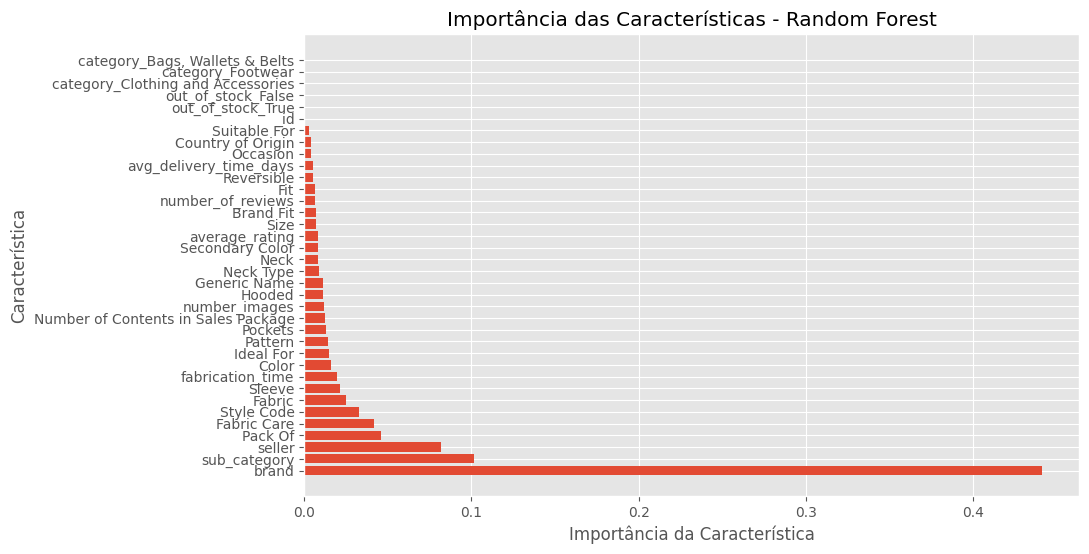

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Crie o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1) 

# Treine o modelo
rf.fit(X, y)

# Obtenha a importância das características
feature_importance = rf.feature_importances_

# Crie um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Classifique as características com base na importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características - Random Forest')
plt.show()

# Machine Learning

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_val.shape

((15850, 36), (3963, 36))

In [44]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Treine modelos individuais
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Faça previsões com os modelos individuais
y_pred_rf = model_rf.predict(X_val)
y_pred_xgb = model_xgb.predict(X_val)

# Crie uma matriz de previsões dos modelos originais
predictions = np.column_stack((y_pred_rf, y_pred_xgb))

# Treine o meta-modelo (neste caso, um modelo de regressão linear)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)
meta_model.fit(predictions, y_train)

# Agora você pode usar o meta-modelo para fazer previsões
meta_predictions = meta_model.predict(predictions)

ValueError: Found input variables with inconsistent numbers of samples: [3963, 15850]

In [ ]:
meta_predictions

In [41]:
#print(f'MAE: {mean_absolute_error(y_pred_rf, y_val)}')
#print(f'MAPE: {mean_absolute_percentage_error(y_pred_rf, y_val)}')
#print(f'RMSE: {mean_squared_error(y_pred_rf, y_val, squared=False)}')
#print(f'SMAPE: {smape(y_pred_rf, y_val)}')
#
#print(f'MAE: {mean_absolute_error(y_pred_xgb, y_val)}')
#print(f'MAPE: {mean_absolute_percentage_error(y_pred_xgb, y_val)}')
#print(f'RMSE: {mean_squared_error(y_pred_xgb, y_val, squared=False)}')
#print(f'SMAPE: {smape(y_pred_xgb, y_val)}')

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
def smape(y_pred, y_test):

    smape = 100 / len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
    return smape

print(f'MAE: {mean_absolute_error(predictions, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(predictions, y_val)}')
print(f'RMSE: {mean_squared_error(predictions, y_val, squared=False)}')
print(f'SMAPE: {smape(predictions, y_val)}')

ValueError: y_true and y_pred have different number of output (2!=1)

## XGBoost

In [ ]:


xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_val = xgb.predict(X_val)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

def smape(y_pred, y_test):

    smape = 100 / len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
    return smape

In [ ]:
print(f'MAE: {mean_absolute_error(y_pred_val, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_val, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_val, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_val, y_val)}')


MAE: 210.89918554451862
MAPE: 0.1387849295892376
RMSE: 395.3333775126965
SMAPE: 13.865713509449895


## Catboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

# Dividir os dados em conjuntos de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treine o modelo
gb_model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred_gb = gb_model.predict(X_val)

# Avalie o desempenho do modelo
#mse = mean_squared_error(y_test, y_pred)
#print(f'Mean Squared Error: {mse}')


In [ ]:
print(f'MAE: {mean_absolute_error(y_pred_gb, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_gb, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_gb, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_gb, y_val)}')

MAE: 292.77606134109817
MAPE: 0.19595796726162446
RMSE: 456.470670308878
SMAPE: 19.89489096296447


In [ ]:
X_train.dtypes

_id                                    float64
average_rating                         float64
number_of_reviews                        int64
brand                                  float64
avg_delivery_time_days                   int64
seller                                 float64
sub_category                           float64
fabrication_time                         int64
Fabric                                 float64
Fabric Care                            float64
Hooded                                 float64
Pockets                                float64
Pack Of                                float64
Secondary Color                        float64
Style Code                             float64
Ideal For                              float64
Reversible                             float64
Neck                                   float64
Generic Name                           float64
Brand Fit                              float64
Pattern                                float64
Sleeve       

In [ ]:
import inflection

X_train.columns = X_train.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X_val.columns = X_val.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X.columns = X.columns.map(lambda x: inflection.parameterize(x, separator='_'))

In [ ]:
X_train.dtypes

id                                     float64
average_rating                         float64
number_of_reviews                        int64
brand                                  float64
avg_delivery_time_days                   int64
seller                                 float64
sub_category                           float64
fabrication_time                         int64
fabric                                 float64
fabric_care                            float64
hooded                                 float64
pockets                                float64
pack_of                                float64
secondary_color                        float64
style_code                             float64
ideal_for                              float64
reversible                             float64
neck                                   float64
generic_name                           float64
brand_fit                              float64
pattern                                float64
sleeve       

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_val)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 15850, number of used features: 35
[LightGBM] [Info] Start training from score 1475.283722


In [ ]:
print(f'MAE: {mean_absolute_error(y_pred_lgb, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_lgb, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_lgb, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_lgb, y_val)}')

MAE: 228.88163445589856
MAPE: 0.15102320373775383
RMSE: 403.0455342967842
SMAPE: 15.219287398812819


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1240, max_depth= 24, max_features= None, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

In [ ]:
print(f'MAE: {mean_absolute_error(y_pred_rf, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_rf, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_rf, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_rf, y_val)}')

MAE: 175.41786190667887
MAPE: 0.10871921750008876
RMSE: 385.790932774958
SMAPE: 10.881710359999124


In [ ]:
X_train

,id,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,fabric,fabric_care,hooded,pockets,pack_of,secondary_color,style_code,ideal_for,reversible,neck,generic_name,brand_fit,pattern,sleeve,country_of_origin,size,fit,number_of_contents_in_sales_package,suitable_for,occasion,color,neck_type,number_images,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
21651,1483.927066,3.7,31,1145.521994,10,979.347730,2810.004425,487,1492.145437,1306.304730,1411.062269,1442.310537,1470.408995,1473.587135,1483.927066,1635.196021,1330.468124,1426.423387,1897.974635,1575.679841,1631.591242,1496.380235,1322.644573,1718.672857,1624.679501,1500.520238,1334.727498,1431.189268,1977.641854,1718.310450,4,False,True,False,True,False
20460,1478.632831,4.2,35,2672.428332,13,2346.836006,1299.093685,456,1373.442108,1499.000000,1401.518494,1435.971218,1432.628279,1468.364378,1478.632831,1389.935445,1628.660377,1418.570106,1576.198132,1191.297860,1285.143218,1177.573206,1573.671274,1187.483262,1306.215925,1495.427163,1551.916543,1423.591140,1190.070249,1131.069544,6,False,True,False,True,False
11783,1481.813135,4.5,37,1019.122152,15,1019.122152,957.898399,163,1178.824970,1290.876137,1404.116714,1437.224524,1466.292199,1468.387259,1481.813135,1632.148453,1324.235482,1420.261098,1583.493306,1571.149864,1579.300505,1489.379256,1582.201058,1715.264628,1622.848480,1499.263853,1322.462870,1425.133144,1340.073922,1715.131082,0,False,True,False,True,False
5488,1483.927066,4.0,33,2416.159142,12,2412.477117,2005.129651,541,2309.779293,1306.304730,1411.062269,1442.310537,1470.408995,1473.587135,1483.927066,1635.196021,1330.468124,1426.423387,1585.493125,1575.679841,1623.499362,1496.380235,1583.453732,1718.672857,1624.679501,1500.520238,1334.727498,1431.189268,2027.924569,1718.310450,6,False,True,False,True,False
19484,1483.927066,4.1,34,1542.718587,13,1542.718587,1303.257589,387,1492.145437,1215.452930,1411.062269,1442.310537,1431.395847,1473.587135,1483.927066,1635.196021,1622.098101,1426.423387,1637.825600,1575.679841,1499.885630,1174.683787,1322.644573,1718.672857,999.000000,1500.520238,1552.319154,1431.189268,1977.641854,1718.310450,4,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,1483.927066,3.4,28,1623.556537,9,1623.556537,1303.257589,263,1492.145437,1690.052922,1411.062269,1442.310537,1631.569131,1543.282979,1499.000000,1390.285966,1622.098101,1426.423387,1585.493125,1206.009195,1571.525891,1277.132587,1583.453732,1157.747121,1309.514480,1500.520238,1552.319154,1431.189268,1193.921562,1139.166355,5,False,True,False,True,False
14078,1483.927066,3.9,32,1199.000000,11,1199.000000,1303.257589,401,1378.942058,1590.060109,1411.062269,1442.310537,1431.395847,1473.587135,1483.927066,1390.285966,1330.468124,1426.423387,1036.933527,1228.617080,1288.984778,1174.683787,1322.644573,1226.672869,1309.514480,1500.520238,1552.319154,1431.189268,1193.921562,1139.166355,2,False,True,False,True,False
6357,1485.211167,3.2,26,1260.169001,8,1263.972349,1300.452403,637,1508.792251,1574.146167,1408.438321,1442.963353,1435.655046,1472.392708,1485.211167,1387.051184,1630.221956,1425.138726,1044.230314,1577.439041,1294.776372,1259.173373,1326.050777,1182.616368,1416.965419,1503.199329,1557.396694,1429.089294,1190.226527,1134.878414,6,False,True,False,True,False
1003,1481.813135,3.4,28,958.860359,9,849.875633,1298.728060,315,1370.173062,1686.060138,1404.116714,1437.224524,1433.252948,1468.387259,1481.813135,1388.189005,1626.619114,1420.261098,1043.792632,1571.149864,1634.786414,1168.505737,1319.351717,1126.298142,1307.016738,1499.263853,1555.946255,1425.133144,1187.764465,1132.122066,4,False,True,False,True,False


In [ ]:
X

,id,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,fabric,fabric_care,hooded,pockets,pack_of,secondary_color,style_code,ideal_for,reversible,neck,generic_name,brand_fit,pattern,sleeve,country_of_origin,size,fit,number_of_contents_in_sales_package,suitable_for,occasion,color,neck_type,number_images,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
0,1481.813135,3.2,26,1053.320699,8,1053.320699,854.699071,653,1370.173062,1290.876137,1404.116714,1437.224524,1433.252948,1468.387259,1481.813135,1632.148453,1324.235482,1420.261098,1583.493306,1571.149864,1274.623473,1489.379256,1582.201058,1715.264628,1622.848480,1499.263853,1322.462870,1425.133144,1975.675197,1715.131082,5,False,True,False,True,False
1,1478.632831,4.0,33,691.847590,12,686.388541,1299.093685,668,1498.404277,1086.836893,1401.518494,1435.971218,1432.628279,1468.364378,1478.632831,1389.935445,1628.660377,1418.570106,1576.198132,1570.575333,1285.143218,1250.954985,1573.671274,1215.046575,1306.215925,1495.427163,1551.916543,1423.591140,1190.070249,1131.069544,2,False,True,False,True,False
2,1481.813135,3.9,32,1098.230547,11,1071.044851,2532.652995,53,1214.750485,1826.343256,2383.011875,1437.224524,1466.292199,1468.387259,1481.813135,1632.148453,1626.619114,2127.924293,1583.493306,1571.149864,1289.260111,1983.396153,1582.201058,1715.264628,1622.848480,1499.263853,1555.946255,1931.979250,2023.725281,1715.131082,5,False,True,False,True,False
3,1481.813135,3.8,31,1009.652082,11,1009.822802,1298.728060,510,1496.572347,1580.483679,1404.116714,1437.224524,1635.743667,1468.387259,1481.813135,1388.189005,1626.619114,1420.261098,1583.493306,1233.636742,1634.786414,1266.424065,1582.201058,1211.758707,1307.016738,1499.263853,1555.946255,1425.133144,1187.764465,1334.077458,5,False,True,False,True,False
4,1483.927066,2.4,20,864.382411,5,663.165753,1303.257589,496,1492.145437,1215.452930,1411.062269,1442.310537,1431.395847,1473.587135,1483.927066,1390.285966,1330.468124,1426.423387,1036.933527,1575.679841,1288.984778,1277.132587,1322.644573,1157.747121,1309.514480,1500.520238,1552.319154,1431.189268,1193.921562,1139.166355,5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,1478.632831,2.5,21,1278.102860,5,1265.577369,1299.093685,552,1498.404277,1574.149745,1401.518494,1435.971218,1432.628279,1468.364378,1478.632831,1389.935445,1628.660377,1418.570106,1044.956897,1570.575333,1624.560453,1976.060968,1319.271897,1212.241351,1416.531922,1495.427163,1551.916543,1423.591140,1190.070249,1131.069544,5,False,True,False,True,False
23304,1475.318738,4.1,34,1134.400709,13,542.141347,2532.229427,501,1487.379978,1291.219449,1400.068172,1433.611699,1472.236542,1462.613950,870.000000,1379.416997,1320.551856,713.931573,645.500404,1566.037996,1279.350383,1973.161529,1319.008544,1710.195426,1624.764385,846.109860,1325.843720,1419.599333,1184.976984,1710.030266,4,False,True,False,True,False
23306,1475.318738,0.0,0,1767.752370,4,1767.752370,1735.350578,687,1646.190632,1193.253921,1400.068172,1433.611699,1472.236542,1336.099617,1999.000000,1629.842322,1320.551856,2479.988675,1889.547744,1566.037996,1628.480196,1487.625987,1319.008544,1710.195426,1624.764385,1491.722637,1325.843720,1419.599333,2057.571442,1710.030266,5,False,True,False,True,False
23307,1483.927066,0.0,0,903.262071,4,903.262071,1303.257589,647,1378.942058,1590.060109,1411.062269,1442.310537,1431.395847,1473.587135,1483.927066,1390.285966,1622.098101,1426.423387,1036.933527,1575.679841,1288.984778,1277.132587,1322.644573,1211.816777,1309.514480,1500.520238,1552.319154,1431.189268,1193.921562,1139.166355,6,False,True,False,True,False


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 24,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1240,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Fine Tuning Optuna

In [ ]:
#import optuna

In [ ]:
#def objective(trial):
#    # Defina os parâmetros que você deseja otimizar
#    n_estimators = trial.suggest_int('n_estimators', 50, 200)
#    max_depth = trial.suggest_int('max_depth', 10, 30)
#    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
#    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
#    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
#
#    # Crie o modelo Random Forest com os parâmetros otimizados
#    model = RandomForestRegressor(
#        n_estimators=n_estimators,
#        max_depth=max_depth,
#        min_samples_split=min_samples_split,
#        min_samples_leaf=min_samples_leaf,
#        max_features=max_features,
#        bootstrap=True,  # Mantenha os outros parâmetros inalterados
#        ccp_alpha=0.0,
#        criterion='squared_error',
#        max_leaf_nodes=None,
#        max_samples=None,
#        min_impurity_decrease=0.0,
#        min_weight_fraction_leaf=0.0,
#        n_jobs=-1,
#        oob_score=False,
#        random_state=None,
#        verbose=0,
#        warm_start=False
#    )
#    
#    model.fit(X_train, y_train)
#    
#    y_pred = model.predict(X_val)
#    
#    smape_error = smape(y_pred, y_val)
#    
#    return smape_error

In [ ]:
#study = optuna.create_study(direction='minimize')
#
#study.optimize(objective, n_trials=50)

In [ ]:
meta_model.fit(X, y)
#meta_predictions = meta_model.predict(predictions)

RandomForestRegressor(random_state=42)

## Previsao No test(fazer as mesmas transformações do treino)

In [ ]:
X_test = pd.read_json( 'test.json', orient='split')

In [ ]:
X_test['product_details_count'] = X_test['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

In [ ]:
X_test['product_details'] = X_test['product_details'].apply(lambda x: ast.literal_eval(x))

In [ ]:
all_keys = set()
for data in X_test['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    X_test[key] = X_test['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
X_test.drop('product_details', axis=1, inplace=True)

In [ ]:
X_test.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)
# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
X_test['Pack Of'].fillna(X_test['Pack Of 2'], inplace=True)

# Agora você pode descartar a coluna 'Pack Of 2' se desejar
X_test.drop('Pack Of 2', axis=1, inplace=True)

In [ ]:
X_test['images'] = X_test['images'].apply(lambda x: ast.literal_eval(x))

In [ ]:
X_test['number_images'] = X_test['images'].apply(lambda x: len(x))

In [ ]:
details_to_maintain_test = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       #'actual_price',
                       "Fabric",
                        "Fabric Care",
                        "Hooded",
                        "Pockets",
                        "Pack Of",
                        "Secondary Color",
                        "Style Code",
                        "Ideal For",
                        "Reversible",
                        "Neck",
                        "Generic Name",
                        "Brand Fit",
                        "Pattern",
                        "Sleeve",
                        "Country of Origin",
                        "Size",
                        "Fit",
                        "Number of Contents in Sales Package",
                        "Suitable For",
                        "Occasion",
                        "Color",
                        "Neck Type",
                        'number_images'
                           ]

In [ ]:
X_test = X_test[details_to_maintain_test]

In [ ]:
##Coluna Fabric
#X_test['has_cotton']    = X_test['Fabric'].str.contains('cott', case=False, na=False)
#X_test['has_polyester'] = X_test['Fabric'].str.contains('poly', case=False, na=False)
#X_test['has_lycra']     = X_test['Fabric'].str.contains('lycr', case=False, na=False)
#
##Coluna Brand Fit
#X_test['is_regular'] = X_test['Brand Fit'].str.contains('reg', case=False, na=False)
#X_test['is_slim']    = X_test['Brand Fit'].str.contains('slim', case=False, na=False)
#X_test['is_fit']     = X_test['Brand Fit'].str.contains('fit', case=False, na=False)

In [ ]:
X_test.head()

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,seller,sub_category,fabrication_time,title,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images
0,35d28961-170f-515d-90d4-55ee978a8afa,4.8,40,Mo,Clothing and Accessories,2021-02-10 21:18:47,Accentuate your formal wardrobe by buying this...,[https://rukminim1.flixcart.com/image/128/128/...,False,17,SHTFDYZGEXPED7YS,KKSONS,Topwear,32,Men Slim Fit Printed Button Down Collar Casual...,Cotton Blend,"Cold water wash only, Gentle Machine Wash",NaN,NaN,1,NaN,11,NaN,No,NaN,Shirt,NaN,Printed,Full Sleeve,India,NaN,Slim,NaN,Western Wear,NaN,White,NaN,4
1,5089618f-7eec-571b-84b6-41c3b43a2ed4,3.7,31,True Bl,Clothing and Accessories,2021-02-10 22:12:20,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,TROFM47EVWRYK7ZU,KAPSONSRETAILPVTLTD,Bottomwear,318,Slim Fit Men Brown Cotton Blend Trousers,Cotton Blend,Gentle Machine Wash,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Trousers,NaN,Solid,NaN,India,NaN,Slim Fit,NaN,Western Wear,Casual,Brown,NaN,5
2,84716375-2ea3-5376-bca1-ecef76b0aa87,3.2,26,vims rai,Clothing and Accessories,2021-02-11 01:16:36,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,8,FABFZAMPGDW3BKGX,WHITE SKY,Fabrics,411,Rayon Printed Shirt Fabric (Unstitched),Rayon,Regular Machine Wash,NaN,NaN,NaN,NaN,Rayon Printed Shirt Fabric (Unstitched) s-155,Men,NaN,NaN,Fabric,NaN,Printed,NaN,India,NaN,NaN,NaN,NaN,Formal,Gold,NaN,4
3,84120873-2b67-5f2c-9074-803e52e278f7,3.6,30,True Bl,Clothing and Accessories,2021-02-10 22:21:32,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,BZRFNMGPNBQTYHMG,KAPSONSRETAILPVTLTD,"Blazers, Waistcoats and Suits",431,Solid Single Breasted Formal Men Full Sleeve B...,Polyester,NaN,NaN,NaN,1,NaN,20318126204,NaN,NaN,NaN,Blazer,NaN,Solid,Full Sleeve,India,NaN,NaN,NaN,NaN,Formal,Blue,NaN,5
4,96238f84-3bb8-5ec1-b2f4-fe481ba35faa,2.5,21,ECKO Unl,Clothing and Accessories,2021-02-10 22:32:00,ECKO Unltd YD CHECK Cotton Woven Slim Fit IND...,[https://rukminim1.flixcart.com/image/128/128/...,False,5,SHTFV5G6PZDQZEVZ,SandSMarketing,Topwear,512,Men Slim Fit Checkered Cut Away Collar Casual ...,Cotton Blend,Gentle Machine Wash,NaN,NaN,1,NaN,EKSH001497,NaN,No,NaN,Shirt,NaN,Checkered,Full Sleeve,India,NaN,Slim,NaN,Western Wear,NaN,Brown,NaN,5


In [ ]:
X_test = pd.get_dummies(X_test, columns=onehot)
X_test[te_cols] = te.transform(X_test[te_cols])

In [ ]:
X_test = X_test.drop(cols_drop, axis=1)
X_test = X_test.drop('pid', axis=1)

In [ ]:
X_test.head()

,_id,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
0,1480.980568,4.8,40,1444.867614,17,1484.968130,1299.049885,32,1496.650804,1480.980568,1480.980568,1480.980568,1431.158920,1480.980568,699.000000,1480.980568,1624.939027,1480.980568,1636.243010,1480.980568,1283.628944,1976.394231,1321.270347,1480.980568,1411.139804,1480.980568,1552.498280,1480.980568,1557.833119,1480.980568,4,False,True,False,True,False
1,1480.980568,3.7,31,2625.158350,10,2845.184491,1996.485795,318,1496.650804,1580.070154,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,2201.916143,1480.980568,1629.287467,1480.980568,1321.270347,1480.980568,2160.091736,1480.980568,1552.498280,1911.728154,1709.479627,1480.980568,5,False,True,False,True,False
2,1480.980568,3.2,26,1203.601184,8,1219.220717,1197.636572,411,1256.351490,1205.255932,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1386.974560,1480.980568,1480.980568,1376.147576,1480.980568,1283.628944,1480.980568,1321.270347,1480.980568,1480.980568,1480.980568,1480.980568,1398.379779,1383.735737,1480.980568,4,False,True,False,True,False
3,1480.980568,3.6,30,2625.158350,10,2845.184491,4129.189314,431,2263.556790,1480.980568,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,5240.223570,1480.980568,1629.287467,1976.394231,1321.270347,1480.980568,1480.980568,1480.980568,1480.980568,1398.379779,2058.922044,1480.980568,5,False,True,False,True,False
4,1480.980568,2.5,21,1281.544466,5,1271.418787,1299.049885,512,1496.650804,1580.070154,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1624.939027,1480.980568,1636.243010,1480.980568,1483.169153,1976.394231,1321.270347,1480.980568,1411.139804,1480.980568,1552.498280,1480.980568,1709.479627,1480.980568,5,False,True,False,True,False


In [ ]:
X_test.columns = X_test.columns.map(lambda x: inflection.parameterize(x, separator='_'))

NameError: name 'inflection' is not defined

## Predict

In [ ]:
#X_test = X_test.drop(['brand_fit','fabric'], axis=1)

In [ ]:
y_pred = meta_model.predict(X_test)


## submissao

In [ ]:
X_test = pd.read_json( 'test.json', orient='split')

In [ ]:
X_test['actual_price'] = y_pred

In [ ]:
cols_sub = ['pid','actual_price']
df_submission = X_test[cols_sub]

In [ ]:
df_submission.to_csv('decima_primeira_submissao.csv', index=False)